## **PCA, Logistic Regression, Cross Validation**

  1. From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs).
  3. Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. Based on **cross-validated accuracy**, select the best number of principal components $m$.


In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

In [10]:
#Select only the rows corresponding to digits  2 and  7
  
################ ziptrain dataset  ####################
url1="https://raw.githubusercontent.com/silpai/McGill_DataScience_ML_Certificate/main/ziptrain.csv"
url2="https://raw.githubusercontent.com/silpai/McGill_DataScience_ML_Certificate/main/ziptest.csv"

ziptrain=pd.read_csv(url1, header=None, sep=" ")

print("ziptrain: Counts of the records by labels:")
ziptrain[0].value_counts()   

print("binar_train dataframe with only 2 & 7 digits:")
binar_train=ziptrain.loc[ziptrain[0].isin([2,7])]
binar_train=binar_train.drop(257,axis=1)
binar_train

print("binar_train checking nulls:")
binar_train_nulls= binar_train[0].isnull().sum()
binar_train_nulls

################ ziptest dataset  ####################

ziptest=pd.read_csv(url2, header=None, sep=" ")

print("ziptest: Counts of the records by labels:")
ziptest[0].value_counts()   

print("binar_test dataframe with only 2 & 7 digits:")
binar_test=ziptest.loc[ziptest[0].isin([2,7])]
binar_test

print("binar_test checking nulls:")
binar_test_nulls= binar_test[0].isnull().sum()
binar_test_nulls

ziptrain: Counts of the records by labels:


0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: 0, dtype: int64

binar_train dataframe with only 2 & 7 digits:


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
10,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.596,0.912,1.000,0.290,...,-1.000,-0.795,0.663,-0.074,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
14,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
15,7.0,-1.0,-1.0,-1.0,-0.929,0.351,0.798,0.806,0.114,0.015,...,0.835,-0.086,-0.991,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
22,7.0,-1.0,-1.0,-1.0,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,...,-0.933,0.667,-0.315,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7206,7.0,-1.0,-1.0,-1.0,-0.752,0.189,0.073,-1.000,-1.000,-1.000,...,-0.952,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7238,2.0,-1.0,-1.0,-1.0,-1.000,-0.112,0.893,-0.042,-0.979,-1.000,...,-0.280,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7243,2.0,-1.0,-1.0,-1.0,-1.000,-0.750,-0.066,0.529,0.357,-0.734,...,0.599,0.387,-0.645,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7244,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.954,0.125,0.709,0.647,...,-0.491,0.866,-0.065,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


binar_train checking nulls:


0

ziptest: Counts of the records by labels:


0    359
1    264
4    200
2    198
9    177
6    170
3    166
8    166
5    160
7    147
Name: 0, dtype: int64

binar_test dataframe with only 2 & 7 digits:


,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
11,2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,...,-0.668,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
12,2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,...,1.000,1.000,1.000,0.270,-0.280,-0.855,-1.000,-1.000,-1.000,-1.000
20,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
21,2,-1.000,-1.000,-1.000,-0.831,0.047,0.140,0.947,0.813,0.012,...,-0.915,-1.000,-1.000,-1.000,-1.000,-0.866,-0.672,0.131,0.135,-0.318
25,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.665,0.603,1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.720,0.711,-0.932,-1.000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,7,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.982,-0.629,0.059,...,-1.000,0.189,0.373,-0.972,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
1964,2,-0.281,1.000,-0.123,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.487,0.983,1.000,0.651,-0.711,-1.000,-1.000,-1.000,-1.000,-1.000
1986,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
1997,7,-1.000,-1.000,-1.000,-1.000,-0.766,-0.883,-0.465,0.115,0.492,...,0.298,-0.845,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000


binar_test checking nulls:


0

PCA(n_components=2)

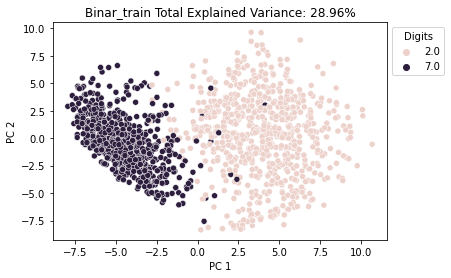

In [11]:
#Project first two principal components 

pca = PCA(n_components=2)
# remove the first column (image label)
pca.fit(binar_train.drop(0,axis=1))
Z=pca.transform(binar_train.drop(0,axis=1))
total_var = pca.explained_variance_ratio_.sum() * 100

_ =sns.scatterplot(x=Z[:,0], y=Z[:,1],data=Z, hue=binar_train[0].values, legend='full')
_ = plt.xlabel('PC 1')
_ = plt.ylabel('PC 2')
_ = plt.title(f'Binar_train Total Explained Variance: {total_var:.2f}%')
_ =plt.legend(bbox_to_anchor=(1,1), 
          title='Digits')
plt.show()



The scatterplot shows the cluster for digits 2 & 7. The explained ratio is about 29% , it suppose to be at least 90%, this conclude that we should not use 2 PCA components. Observing the scatterplot you can see that some of the digit 2 points is callsified as Digit 7 (i.e., the points extrapolates each other borders). I tried PCA(n_components=4)  and the explained ratio continue to be less than 50%.

In [12]:
#Fit a logistic regression

Z=pca.transform(binar_train.drop(0,axis=1))
y=binar_train[0]
lor = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.25, random_state=0)
lor.fit(X_train,y_train)



LogisticRegression()

In [13]:
#Evaluate the trainded model 
y_predict_test = lor.predict(X_test)

print('\n Accuracy: ', accuracy_score(y_test, y_predict_test))
print('\n Classification Report: \n ', classification_report(y_test, y_predict_test))


 Accuracy:  0.9767441860465116

 Classification Report: 
                precision    recall  f1-score   support

         2.0       0.97      0.98      0.98       185
         7.0       0.98      0.97      0.97       159

    accuracy                           0.98       344
   macro avg       0.98      0.98      0.98       344
weighted avg       0.98      0.98      0.98       344



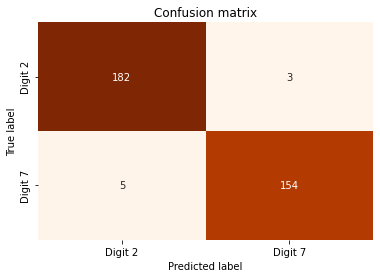

In [14]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict_test, labels=[2,7])

_=sns.heatmap(conf_matrix,cmap="Oranges",  fmt='g', annot=True,
              xticklabels=['Digit 2','Digit 7'], yticklabels=['Digit 2','Digit 7'], 
              cbar=False)
_=plt.title('Confusion matrix')
_=plt.xlabel("Predicted label")
_=plt.ylabel("True label")
_=plt.show()


PCA(n_components=2)

Total explained Variance Ratio PCA 𝑚=2 0.2685


PCA(n_components=3)

Total explained Variance Ratio PCA 𝑚=3 0.3342


PCA(n_components=4)

Total explained Variance Ratio PCA 𝑚=4 0.3898


PCA(n_components=5)

Total explained Variance Ratio PCA 𝑚=5 0.4389


C:\Users\silvane.paixao\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 119898 (\N{MATHEMATICAL ITALIC SMALL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


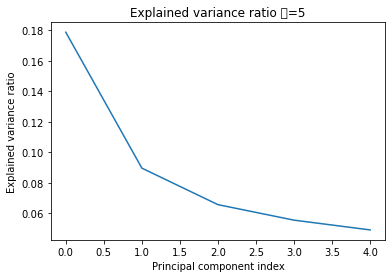

In [15]:
#Appy different PCAs
pca2 = PCA(n_components=2)
# remove the first column (image label)
pca2.fit(ziptrain.drop([0,257],axis=1))
print('Total explained Variance Ratio PCA 𝑚=2 {:.4f}'.format(pca2.explained_variance_ratio_.sum()))

pca3 = PCA(n_components=3)
# remove the first column (image label)
pca3.fit(ziptrain.drop([0,257],axis=1))
print('Total explained Variance Ratio PCA 𝑚=3 {:.4f}'.format(pca3.explained_variance_ratio_.sum()))


pca4 = PCA(n_components=4)
# remove the first column (image label)
pca4.fit(ziptrain.drop([0,257],axis=1))
print('Total explained Variance Ratio PCA 𝑚=4 {:.4f}'.format(pca4.explained_variance_ratio_.sum()))

pca5 = PCA(n_components=5)
# remove the first column (image label)
pca5.fit(ziptrain.drop([0,257],axis=1))
print('Total explained Variance Ratio PCA 𝑚=5 {:.4f}'.format(pca5.explained_variance_ratio_.sum()))
_= plt.plot(pca5.explained_variance_ratio_)
_= plt.xlabel('Principal component index')
_= plt.ylabel('Explained variance ratio')
_= plt.title('Explained variance ratio 𝑚=5')
plt.show()

In [16]:
#Use linear discriminant classifier 

X=ziptrain.drop([0,257],axis=1)
y=ziptrain[0]

lda2=LinearDiscriminantAnalysis(n_components = 2)
model_lda2=lda2.fit(X,y)
x_lda2 = lda2.transform(X)

lda3=LinearDiscriminantAnalysis(n_components = 3)
model_lda3=lda3.fit(X,y)
x_lda3 = lda3.transform(X)

lda4=LinearDiscriminantAnalysis(n_components = 4)
model_lda4=lda4.fit(X,y)
x_lda4 = lda4.transform(X)

lda5=LinearDiscriminantAnalysis(n_components = 5)
model_lda5=lda5.fit(X,y)
x_lda5 = lda5.transform(X)

print("ziptrain dimension:", X.shape)
print("𝑚=2 reduced the dimensions to:", x_lda2.shape)
print("𝑚=3 reduced the dimensions to:", x_lda3.shape)
print("𝑚=4 reduced the dimensions to:", x_lda4.shape)
print("𝑚=5 reduced the dimensions to:", x_lda5.shape)



ziptrain dimension: (7291, 256)
𝑚=2 reduced the dimensions to: (7291, 2)
𝑚=3 reduced the dimensions to: (7291, 3)
𝑚=4 reduced the dimensions to: (7291, 4)
𝑚=5 reduced the dimensions to: (7291, 5)


In [17]:
#Evaluate Model

scores = cross_val_score(lda2,X ,y , cv=5)
print("Accuracy of 𝑚=2: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))
scores = cross_val_score(lda3,X ,y , cv=5)
print("Accuracy of 𝑚=3: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))
scores = cross_val_score(lda4,X ,y , cv=5)
print("Accuracy of 𝑚=4: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))
scores = cross_val_score(lda5,X ,y , cv=5)
print("Accuracy of 𝑚=5: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() / 2))

print("total explained variance for 𝑚=2 new dimensions",lda2.explained_variance_ratio_.sum())
print("total explained variance for 𝑚=3 new dimensions",lda3.explained_variance_ratio_.sum())
print("total explained variance for 𝑚=4 new dimensions",lda4.explained_variance_ratio_.sum())
print("total explained variance for 𝑚=5 new dimensions",lda5.explained_variance_ratio_.sum())

Accuracy of 𝑚=2: 0.921 (+/- 0.002)
Accuracy of 𝑚=3: 0.921 (+/- 0.002)
Accuracy of 𝑚=4: 0.921 (+/- 0.002)
Accuracy of 𝑚=5: 0.921 (+/- 0.002)
total explained variance for 𝑚=2 new dimensions 0.5545779419842396
total explained variance for 𝑚=3 new dimensions 0.6697326444532363
total explained variance for 𝑚=4 new dimensions 0.7788860794953549
total explained variance for 𝑚=5 new dimensions 0.8562579854890109


The cross-validated accuracy was the same for all 𝑚 components, since the total explained variance for  𝑚=5 was 86% , I would select 𝑚=5 as the best number of principal components.